In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsx
import warnings
warnings.filterwarnings('ignore')
# Load the CSV file
df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory=False)
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [3]:
# Convert "Created Date" and "Closed Date" to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

# Calculate time difference and converting request closing time into seconds
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600

df[['Created Date','Closed Date','Request_Closing_Time']].head()


,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0.920833
1,2015-12-31 23:59:44,2016-01-01 01:26:00,1.437778
2,2015-12-31 23:59:29,2016-01-01 04:51:00,4.858611
3,2015-12-31 23:57:46,2016-01-01 07:43:00,7.753889
4,2015-12-31 23:56:58,2016-01-01 03:24:00,3.450556


In [4]:
#define a list of column names that we do not need for analysis
irrelevant_columns = [
    'Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name',
    'Park Borough','School Name', 'School Number','School Region','School Code',
    'School Phone Number','School Address','School City','School State','School Zip',
    'School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
    'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name',
    'Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date',
    'Resolution Action Updated Date','Community Board','Facility Type','Location'
] 

df_cleaned = df.drop(columns=irrelevant_columns, errors='ignore') #removing them from dataset
print(df_cleaned.columns.tolist())


['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status', 'Resolution Description', 'Borough', 'Latitude', 'Longitude', 'Request_Closing_Time']


In [5]:

df_cleaned = df_cleaned.dropna() #removes any rows in the dataset that contain missing (NaN) values in any column
After_cleaned_NaN_count=df_cleaned.isna().sum()
After_cleaned_NaN_count

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

In [25]:
#getting unique values from all the columns
unique_info = []

for column in df_cleaned.columns:
    unique = df_cleaned[column].nunique()
    dtype = str(df_cleaned[column].dtype)

    if unique < 10 and df_cleaned[column].dtype == 'object':
        sample_values = ', '.join(str(x) for x in df_cleaned[column].unique()[:5])
        if unique > 5:
            sample_values += ", ..."
    else:
        if df_cleaned[column].dtype == 'object':
            sample_values = f"Too many to display ({unique} unique values)"
        else:
            sample_values = f"Range: {df_cleaned[column].min()} to {df_cleaned[column].max()}"

    unique_info.append({
        'Column': column,
        'Data Type': dtype,
        'Unique Values': unique,
        'Sample Values': sample_values
    })

unique_info_df = pd.DataFrame(unique_info)
(unique_info_df)

,Column,Data Type,Unique Values,Sample Values
0,Unique Key,int64,291107,Range: 30279480 to 32310649
1,Created Date,datetime64[ns],251970,Range: 2015-03-29 00:33:01 to 2015-12-31 23:59:45
2,Closed Date,datetime64[ns],231991,Range: 2015-03-29 00:57:23 to 2016-01-03 16:22:00
3,Agency,object,1,NYPD
4,Complaint Type,object,15,Too many to display (15 unique values)
5,Descriptor,object,41,Too many to display (41 unique values)
6,Location Type,object,14,Too many to display (14 unique values)
7,Incident Zip,float64,200,Range: 83.0 to 11697.0
8,City,object,53,Too many to display (53 unique values)
9,Status,object,1,Closed


In [7]:

summary_stats = df_cleaned.describe().T[['mean', 'std']] #shows mean and standard deviation from df_cleaned dataset
summary_stats['sum'] = df_cleaned.select_dtypes(include=np.number).sum() #create a new column sum and prints total for each numeric column
summary_stats['skewness'] = df_cleaned.select_dtypes(include=np.number).skew() #measures asymmetry of the data distribution
summary_stats['kurtosis'] = df_cleaned.select_dtypes(include=np.number).kurtosis() #measure of the tailedness of a distribution

summary_stats

,mean,std,sum,skewness,kurtosis
Unique Key,31301576.242739,575377.738707,9.112108e+12,0.016898,-1.176593
Created Date,2015-08-14 11:25:43.378747648,NaN,NaN,NaN,NaN
Closed Date,2015-08-14 15:44:15.511413248,NaN,NaN,NaN,NaN
Incident Zip,10857.977349,580.280774,3.160833e+09,-2.553956,37.827777
Latitude,40.725681,0.082411,1.185553e+07,0.123114,-0.734818
Longitude,-73.925035,0.078654,-2.152010e+07,-0.312739,1.455600
Request_Closing_Time,4.308926,6.062641,1.254358e+06,14.299525,849.777081


In [8]:
correlation_matrix = df_cleaned.corr(numeric_only=True) #corealtion of all variables
correlation_matrix

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
Unique Key,1.000000,0.025492,-0.032613,-0.008621,0.053126
Incident Zip,0.025492,1.000000,-0.499081,0.385934,0.057182
Latitude,-0.032613,-0.499081,1.000000,0.368819,0.024497
Longitude,-0.008621,0.385934,0.368819,1.000000,0.109724
Request_Closing_Time,0.053126,0.057182,0.024497,0.109724,1.000000


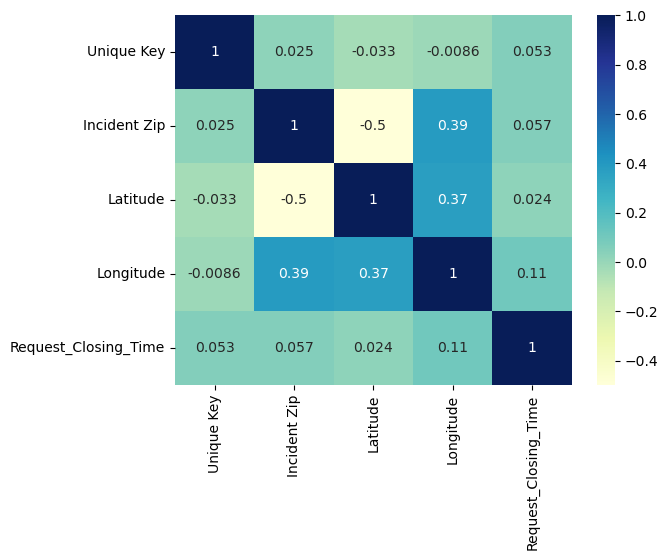

In [9]:

# Plot correlation heatmap
snsx.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

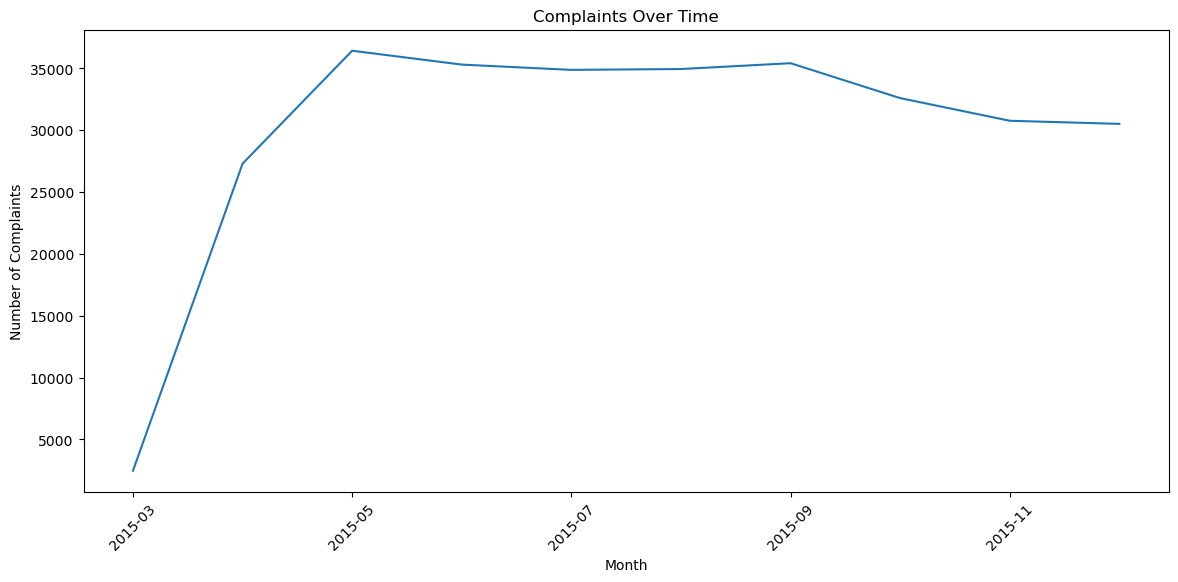

In [10]:
#complaints over time 
df['Created Month'] = df['Created Date'].dt.to_period('M').astype(str)
complaints_over_time = df.groupby('Created Month').size()
plt.figure(figsize=(14,6))
complaints_over_time.plot()
plt.title('Complaints Over Time')
plt.ylabel('Number of Complaints')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


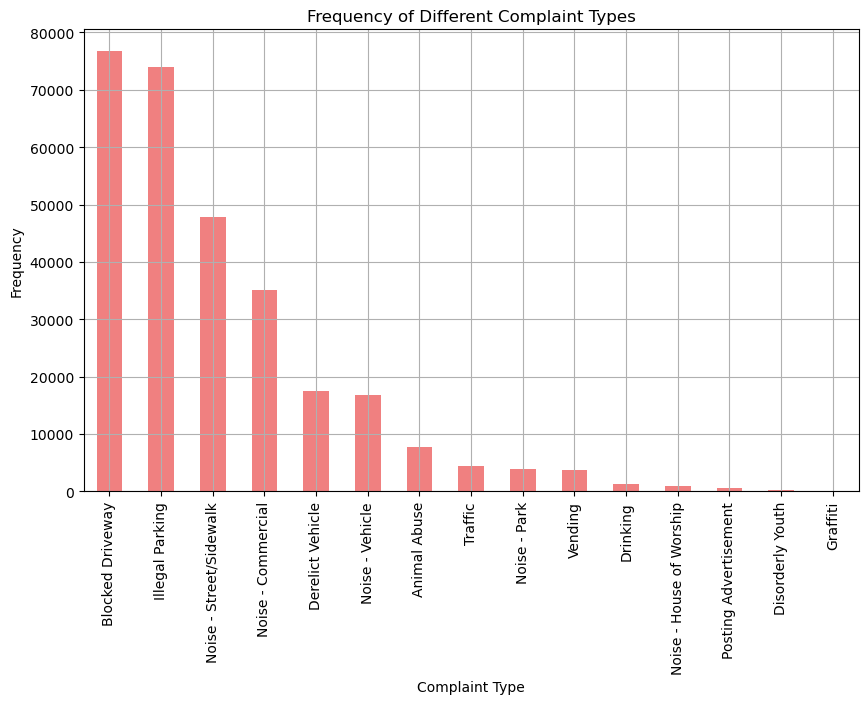

In [11]:
# Bar chart for the complaint types and their frequency
complaint_count = df_cleaned['Complaint Type'].value_counts()

plt.figure(figsize=(10, 6))
complaint_count.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Different Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


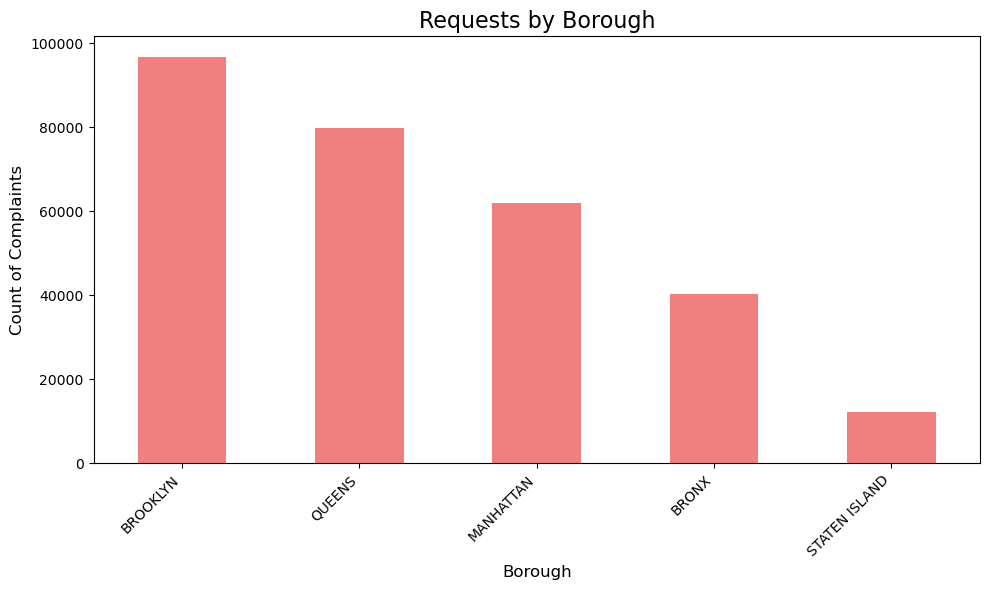

In [12]:
plt.figure(figsize=(10, 6))
borough_counts = df_cleaned['Borough'].value_counts()
borough_counts.plot(kind='bar', color='lightcoral')
plt.title('Requests by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Count of Complaints', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


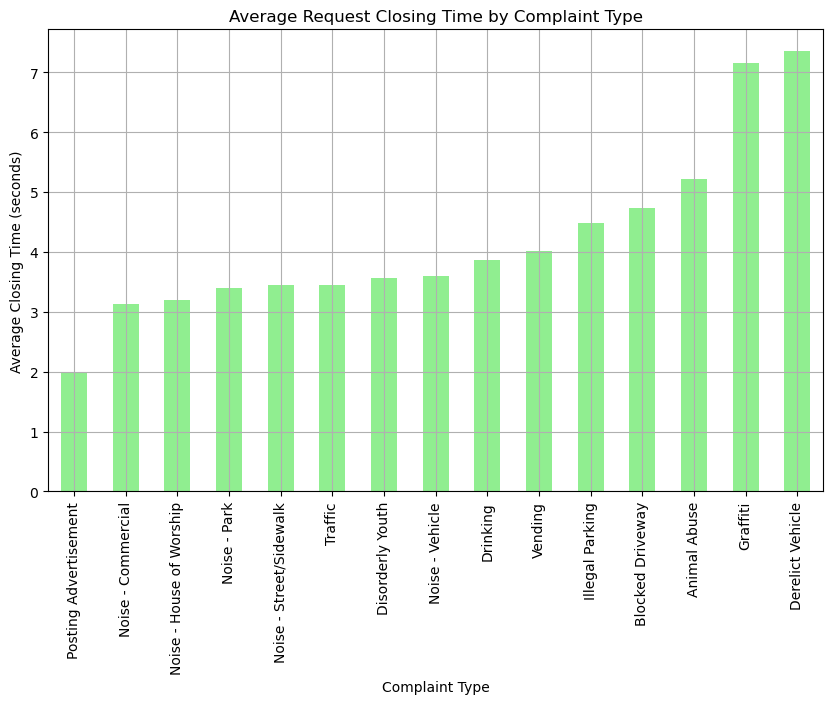

In [13]:
# Bar chart showing complaint types categorized by average request closing time
avg_closing_time_by_complaint = df_cleaned.groupby('Complaint Type')['Request_Closing_Time'].mean()

plt.figure(figsize=(10, 6))
avg_closing_time_by_complaint.sort_values().plot(kind='bar', color='lightgreen')
plt.title('Average Request Closing Time by Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Average Closing Time (seconds)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

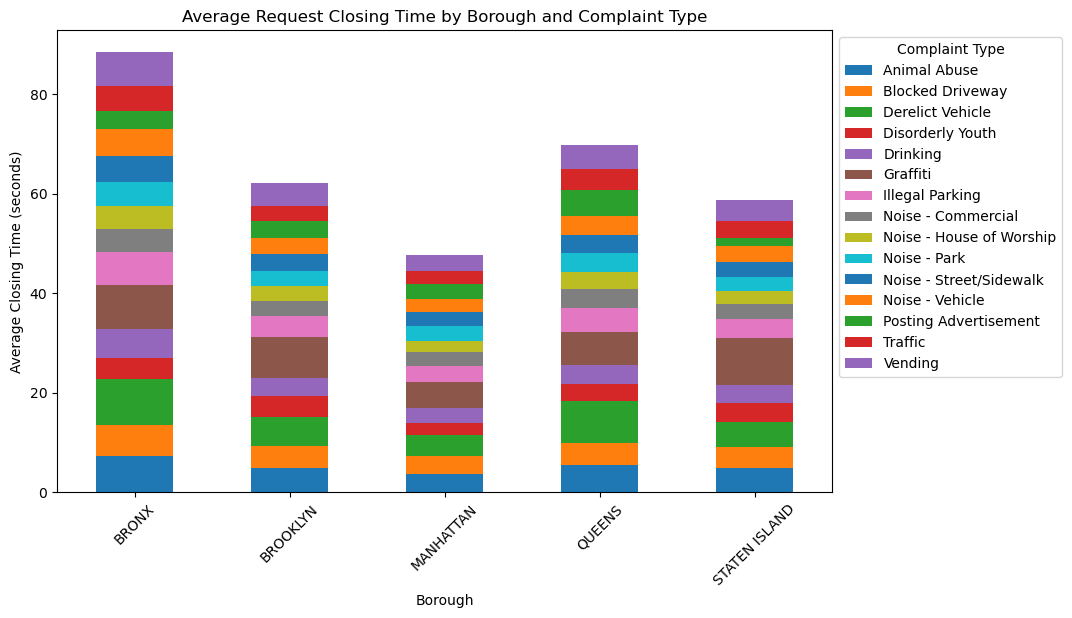

In [14]:
# Grouping by Borough and Complaint Type to analyze
avg_closing_time_by_borough_complaint = df_cleaned.groupby(['Borough', 'Complaint Type'])['Request_Closing_Time'].mean().unstack()

plt.figure(figsize=(12, 8))
avg_closing_time_by_borough_complaint.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Request Closing Time by Borough and Complaint Type')
plt.xlabel('Borough')
plt.ylabel('Average Closing Time (seconds)')
plt.xticks(rotation=45)
plt.legend(title='Complaint Type', bbox_to_anchor=(1, 1))
plt.show()


### Null Hypothesis (H0)

The null hypothesis (H0) is a statement that says there is no change, effect, or difference. It represents the current belief or status quo that we accept unless there is strong evidence against it.

### Alternate Hypothesis (H1)

The alternate hypothesis (H1) is a statement that goes against the null hypothesis. It represents what we want to prove or find evidence for in the test. It challenges the current belief (the null hypothesis), and we try to gather enough proof to reject the null and support the alternate hypothesis instead.

### P-Value

The p-value is a number between 0 and 1 that shows how strong the evidence is against the null hypothesis. If this number is small (usually less than 0.05), it means the data we observed doesn't fit well with the idea that the null hypothesis is true.

In simple terms, the p-value tells us how likely it is to get the results we did if the null hypothesis was correct. A small p-value means it's unlikely that the results happened just by chance.

In [15]:

from scipy import stats

# Group data by Complaint Type and calculate the Request Closing Time
complaint_group = df_cleaned.groupby('Complaint Type')['Request_Closing_Time']

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*[group.dropna() for name, group in complaint_group])


print(f"ANOVA test result: F-statistic = {f_stat}, p-value = {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average response time across complaint types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average response time across complaint types.")


ANOVA test result: F-statistic = 578.9120337398356, p-value = 0.0
Reject the null hypothesis: There is a significant difference in average response time across complaint types.


In [16]:
# Create a contingency table for Complaint Type vs Borough
contingency_table = pd.crosstab(df_cleaned['Complaint Type'], df_cleaned['Borough'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square test result: Chi2-statistic = {chi2_stat}, p-value = {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship between complaint type and location (borough).")
else:
    print("Fail to reject the null hypothesis: There is no relationship between complaint type and location (borough).")


Chi-Square test result: Chi2-statistic = 73264.62164334783, p-value = 0.0
Reject the null hypothesis: There is a relationship between complaint type and location (borough).
